In [55]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
import noisereduce as nr
from google.colab import drive


In [56]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
celltypes = ['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']
path = ["/content/gdrive/MyDrive/heart" +  "/" + celltype  for celltype in celltypes]
path

['/content/gdrive/MyDrive/heart/artifact',
 '/content/gdrive/MyDrive/heart/extrahls',
 '/content/gdrive/MyDrive/heart/extrastole',
 '/content/gdrive/MyDrive/heart/murmur',
 '/content/gdrive/MyDrive/heart/normal']

In [104]:
def features_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    reduced_noise = nr.reduce_noise(y=audio, sr=sample_rate)
    mfccs_features = librosa.feature.mfcc(y=reduced_noise, sr=sample_rate, n_mfcc=25)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [105]:
extracted_features=[]
for index, values in enumerate(path):
    file_name = os.listdir(values)
    for i in range(0,len(file_name)):
      final_class_labels=celltypes[index]
      data=features_extractor("/content/gdrive/MyDrive/heart" + "/"+final_class_labels +"/"+file_name[i])
      extracted_features.append([data,final_class_labels])

In [106]:
# We will convert extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.tail()
extracted_features_df["class"].value_counts()

normal        351
murmur        129
extrastole     46
artifact       40
extrahls       19
Name: class, dtype: int64

In [107]:
# We then split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [108]:
X.shape

(585, 25)

In [109]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [111]:
num_labels=6

In [112]:
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten

In [118]:
model = Sequential()


model.add(Dense(128,activation='relu',input_shape=(25,)))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               3328      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 5)               

In [119]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               3328      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 64)                4160      
                                                                 
 flatten_6 (Flatten)         (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 5)               

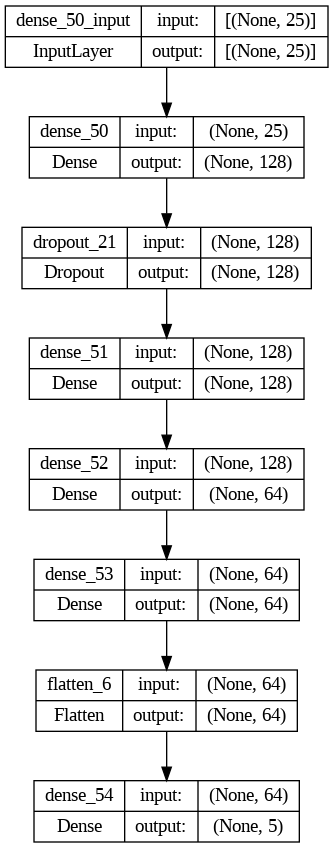

In [120]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [130]:
# Trianing the model

epochscount = 150
num_batch_size = 15

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=epochscount, validation_data=(X_test, y_test), verbose=1)


Epoch 1/150
32/32 [==============================] - 0s 8ms/step - loss: 0.5768 - acc: 0.7607 - val_loss: 0.5986 - val_acc: 0.7607
Epoch 2/150
32/32 [==============================] - 0s 5ms/step - loss: 0.6048 - acc: 0.7521 - val_loss: 0.6123 - val_acc: 0.7607
Epoch 3/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5812 - acc: 0.7628 - val_loss: 0.6152 - val_acc: 0.7607
Epoch 4/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6116 - acc: 0.7543 - val_loss: 0.6068 - val_acc: 0.7607
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5997 - acc: 0.7521 - val_loss: 0.6266 - val_acc: 0.7521
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5902 - acc: 0.7671 - val_loss: 0.6097 - val_acc: 0.7607
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.5724 - acc: 0.7735 - val_loss: 0.6161 - val_acc: 0.7607
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.5902 - a

In [131]:
validation_test_set_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(validation_test_set_accuracy[1])

0.752136766910553


In [54]:
model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


array([[9.73121205e-05, 1.56787428e-05, 6.73653260e-02, 1.47987574e-01,
        4.82472032e-01, 3.02062124e-01],
       [9.02289599e-02, 2.10687160e-01, 2.68258085e-03, 1.28120467e-01,
        3.04575771e-01, 2.63705045e-01],
       [6.67050472e-06, 3.54861754e-07, 6.90154284e-02, 1.23508856e-01,
        4.98556167e-01, 3.08912426e-01],
       ...,
       [7.27056540e-05, 1.08827580e-05, 6.76718280e-02, 1.45321310e-01,
        4.84728456e-01, 3.02194774e-01],
       [1.44847159e-04, 2.80898112e-05, 6.71519786e-02, 1.52018771e-01,
        4.79787797e-01, 3.00868541e-01],
       [5.75783706e-05, 7.47554714e-06, 6.76331222e-02, 1.42948672e-01,
        4.85701293e-01, 3.03651929e-01]], dtype=float32)